<a href="https://colab.research.google.com/github/shebegyare131/shebegyare131/blob/main/Sarima_arima_of_pressure_cobination_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [305]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [306]:
df=pd.read_csv('pressure.csv')
df.head()

,created_at,pressure
0,2022-02-05 07:03:27 UTC,509.26
1,2022-02-05 07:03:49 UTC,509.13
2,2022-02-05 07:04:10 UTC,509.69
3,2022-02-05 07:04:31 UTC,509.98
4,2022-02-05 07:04:52 UTC,508.98


In [307]:
df.tail()

,created_at,pressure
523,2022-02-20 08:54:01 UTC,557.06
524,2022-02-20 08:54:40 UTC,551.75
525,2022-02-20 08:55:42 UTC,551.24
526,2022-02-20 08:55:58 UTC,551.75
527,2022-02-20 08:55:58 UTC,551.24


In [308]:
df.colunms=["created_at	","pressure"]
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,created_at,pressure
0,2022-02-05 07:03:27 UTC,509.26
1,2022-02-05 07:03:49 UTC,509.13
2,2022-02-05 07:04:10 UTC,509.69
3,2022-02-05 07:04:31 UTC,509.98
4,2022-02-05 07:04:52 UTC,508.98


In [309]:
df.tail()

,created_at,pressure
523,2022-02-20 08:54:01 UTC,557.06
524,2022-02-20 08:54:40 UTC,551.75
525,2022-02-20 08:55:42 UTC,551.24
526,2022-02-20 08:55:58 UTC,551.75
527,2022-02-20 08:55:58 UTC,551.24


In [310]:
df['created_at']=pd.to_datetime(df["created_at"])

In [311]:
df.head()

,created_at,pressure
0,2022-02-05 07:03:27+00:00,509.26
1,2022-02-05 07:03:49+00:00,509.13
2,2022-02-05 07:04:10+00:00,509.69
3,2022-02-05 07:04:31+00:00,509.98
4,2022-02-05 07:04:52+00:00,508.98


In [312]:
df.set_index("created_at",inplace=True)

In [313]:
df.head()

,pressure
created_at,
2022-02-05 07:03:27+00:00,509.26
2022-02-05 07:03:49+00:00,509.13
2022-02-05 07:04:10+00:00,509.69
2022-02-05 07:04:31+00:00,509.98
2022-02-05 07:04:52+00:00,508.98


In [314]:
df.shape

(528, 1)

In [315]:
df.describe()

,pressure
count,528.000000
mean,541.131610
std,25.712945
min,498.490000
25%,511.140000
50%,544.485000
75%,562.760000
max,612.730000


In [316]:
df.isnull().sum()

pressure    0
dtype: int64

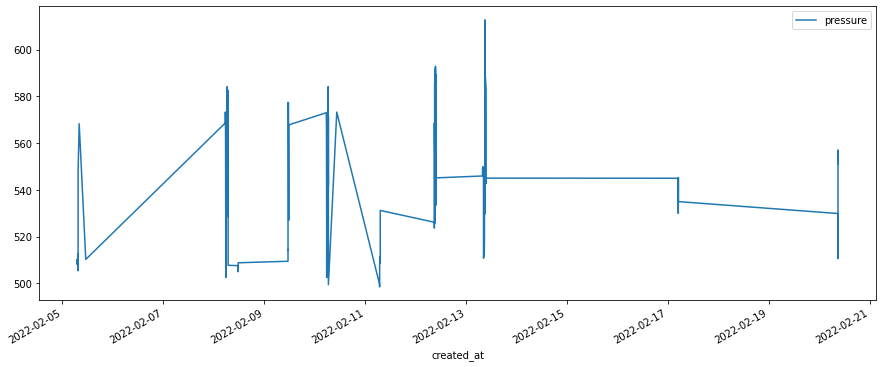

In [317]:
df.plot(figsize=(15,6))
plt.show()

In [318]:
from statsmodels.tsa.stattools import adfuller

In [319]:
test_result=adfuller(df['pressure'])

In [320]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(	pressure):
    result=adfuller(	pressure)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [321]:
adfuller_test(df['pressure'])

ADF Test Statistic : -5.214528340813553
p-value : 8.211063551217841e-06
#Lags Used : 1
Number of Observations Used : 526
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [322]:
df['pr6essureFirst Difference'] = df['pressure'] - df['pressure'].shift(1)

In [323]:
df['pressure'].shift(1)

created_at
2022-02-05 07:03:27+00:00       NaN
2022-02-05 07:03:49+00:00    509.26
2022-02-05 07:04:10+00:00    509.13
2022-02-05 07:04:31+00:00    509.69
2022-02-05 07:04:52+00:00    509.98
                              ...  
2022-02-20 08:54:01+00:00    510.60
2022-02-20 08:54:40+00:00    557.06
2022-02-20 08:55:42+00:00    551.75
2022-02-20 08:55:58+00:00    551.24
2022-02-20 08:55:58+00:00    551.75
Name: pressure, Length: 528, dtype: float64

In [324]:
df['Seasonal First Difference']=df['pressure']-df['pressure'].shift(12)

In [325]:
df.head(14)

,pressure,pr6essureFirst Difference,Seasonal First Difference
created_at,,,
2022-02-05 07:03:27+00:00,509.26,NaN,NaN
2022-02-05 07:03:49+00:00,509.13,-0.13,NaN
2022-02-05 07:04:10+00:00,509.69,0.56,NaN
2022-02-05 07:04:31+00:00,509.98,0.29,NaN
2022-02-05 07:04:52+00:00,508.98,-1.00,NaN
2022-02-05 07:05:13+00:00,508.65,-0.33,NaN
2022-02-05 07:05:34+00:00,508.79,0.14,NaN
2022-02-05 07:05:56+00:00,509.33,0.54,NaN
2022-02-05 07:06:32+00:00,509.24,-0.09,NaN


In [326]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -5.3839195668727715
p-value : 3.6608229526036804e-06
#Lags Used : 12
Number of Observations Used : 503
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


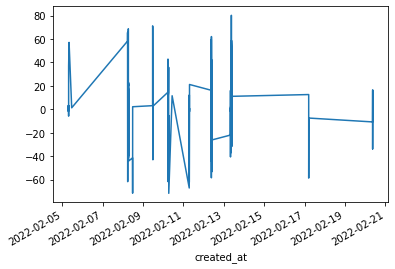

In [327]:
df['Seasonal First Difference'].plot()

In [ ]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(df['pressure'])
plt.show()

In [329]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

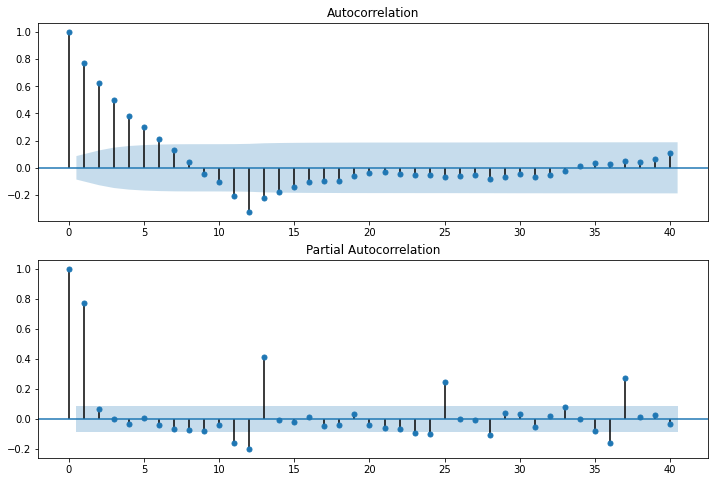

In [330]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [331]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [332]:
model=ARIMA(df['pressure'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [333]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.pressure   No. Observations:                  527
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2066.855
Method:                       css-mle   S.D. of innovations             12.215
Date:                Sat, 26 Mar 2022   AIC                           4141.710
Time:                        05:47:05   BIC                           4158.779
Sample:                             1   HQIC                          4148.393
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0644      0.171      0.377      0.707      -0.271       0.399
ar.L1.D.pressure     0.7532      0.056     13.455      0.000       0.643       0.863
ma.L1.D.pressure    -0.9220      0.034    -27.040      0.000      -0.989      -0.855
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3277           +0.0000j            1.3277            0.0000
MA.1            1.0845           +0.0000j            1.0845            0.0000
-----------------------------------------------------------------------------
"""

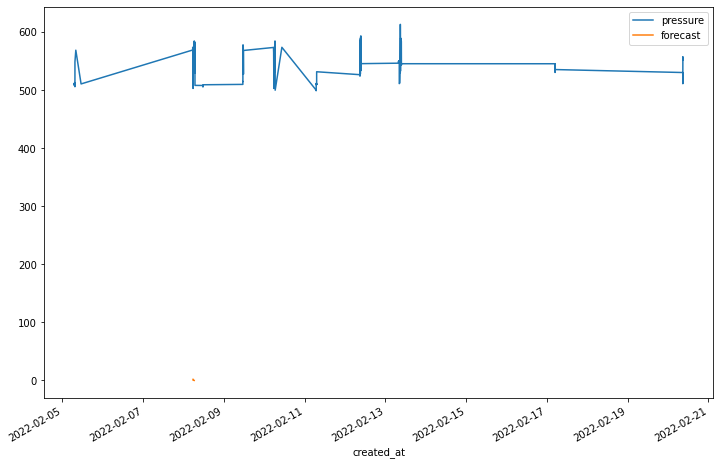

In [334]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['pressure','forecast']].plot(figsize=(12,8))

In [335]:
import statsmodels.api as sm

In [336]:
model=sm.tsa.statespace.SARIMAX(df['pressure'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


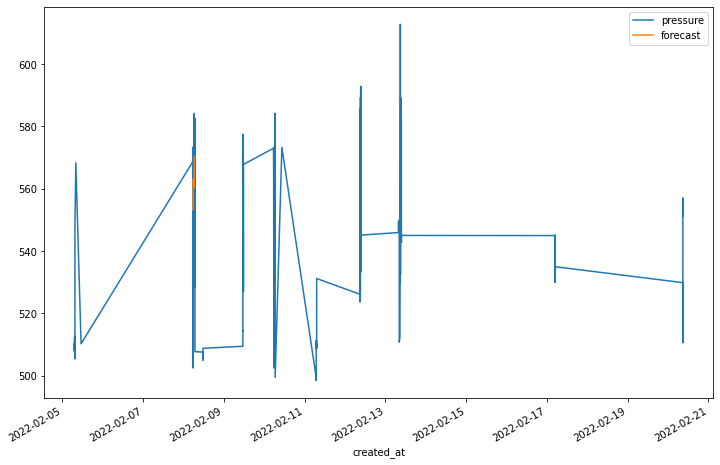

In [337]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['pressure','forecast']].plot(figsize=(12,8))

In [338]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [339]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [340]:
future_datest_df.tail()

,pressure,pr6essureFirst Difference,Seasonal First Difference,forecast
2023-09-20 08:55:58+00:00,NaN,NaN,NaN,NaN
2023-10-20 08:55:58+00:00,NaN,NaN,NaN,NaN
2023-11-20 08:55:58+00:00,NaN,NaN,NaN,NaN
2023-12-20 08:55:58+00:00,NaN,NaN,NaN,NaN
2024-01-20 08:55:58+00:00,NaN,NaN,NaN,NaN


In [341]:
future_df=pd.concat([df,future_datest_df])

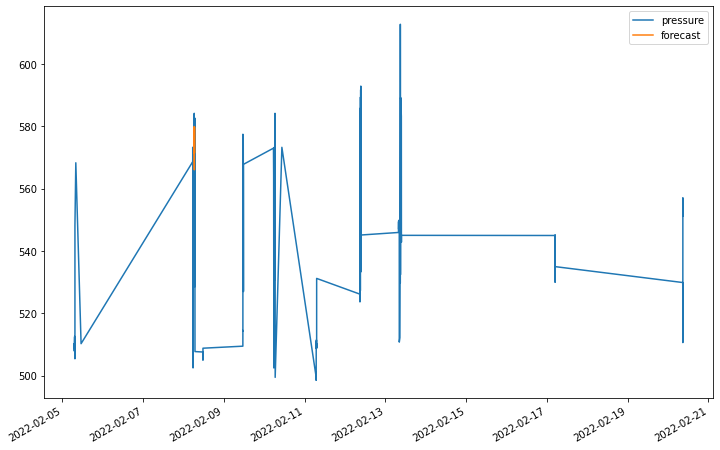

In [342]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['pressure', 'forecast']].plot(figsize=(12, 8)) 